In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data,wb

In [2]:
df1 = data.DataReader("HDFCBANK.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']
df2 = data.DataReader("SBIN.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']
df3 = data.DataReader("BAJAJFINSV.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']
df4 = data.DataReader("ASIANPAINT.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']
df5 = data.DataReader("HINDUNILVR.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']
df6 = data.DataReader("INFY.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']
df7 = data.DataReader("MARUTI.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']
df8 = data.DataReader("ONGC.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']
df9 = data.DataReader("RELIANCE.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']
df10 = data.DataReader("SUNPHARMA.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']
df11 = data.DataReader("TCS.NS", start = '2014-11-03' , end = '2019-11-01' , data_source = 'yahoo')['Adj Close']

In [3]:
frames = [df1, df2, df3 ,df4,df5,df6,df7,df8,df9,df10,df11]

data = pd.concat(frames , axis = 1,ignore_index = False)

In [4]:
data.columns = ['HDFCBANK' ,'SBIN', 'BAJAJFINSV','ASIAN_PAINT',
                'HINDUNILVR','INFY', 'MARUTI', 'ONGC', 'RELIANCE', 'SUNPHARMA','TCS']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1228 entries, 2014-11-03 to 2019-11-01
Data columns (total 11 columns):
HDFCBANK       1228 non-null float64
SBIN           1228 non-null float64
BAJAJFINSV     1228 non-null float64
ASIAN_PAINT    1228 non-null float64
HINDUNILVR     1228 non-null float64
INFY           1226 non-null float64
MARUTI         1228 non-null float64
ONGC           1228 non-null float64
RELIANCE       1228 non-null float64
SUNPHARMA      1228 non-null float64
TCS            1228 non-null float64
dtypes: float64(11)
memory usage: 115.1 KB


In [6]:
data.to_csv(r'C:\Users\SARVESH\Documents\My Tableau Repository\Datasources\STOCK DATA\Portfolio_new.csv')

In [7]:
r = np.log(data/data.shift(1))

In [8]:
r.mean()*252*100


HDFCBANK       22.103611
SBIN            3.604117
BAJAJFINSV     42.709017
ASIAN_PAINT    21.192081
HINDUNILVR     23.814473
INFY           12.088914
MARUTI         18.381906
ONGC           -8.273606
RELIANCE       23.360851
SUNPHARMA     -13.289312
TCS            13.826896
dtype: float64

In [9]:
r.cov()*252*100

,HDFCBANK,SBIN,BAJAJFINSV,ASIAN_PAINT,HINDUNILVR,INFY,MARUTI,ONGC,RELIANCE,SUNPHARMA,TCS
HDFCBANK,2.891570,1.814249,1.778008,1.327504,1.072430,0.527566,1.655441,1.129121,1.392465,0.785792,0.525728
SBIN,1.814249,11.631717,2.865522,2.172863,1.285619,0.892121,3.078841,2.928308,2.566715,1.694609,0.559320
BAJAJFINSV,1.778008,2.865522,9.805886,2.385960,1.306529,0.332021,2.804531,2.015474,2.104267,2.015652,0.184017
ASIAN_PAINT,1.327504,2.172863,2.385960,6.133007,1.623003,0.644780,2.421305,1.291137,1.676623,1.104952,0.502085
HINDUNILVR,1.072430,1.285619,1.306529,1.623003,4.459235,0.557527,1.539918,0.988533,0.996541,1.019992,0.607761
INFY,0.527566,0.892121,0.332021,0.644780,0.557527,6.443459,0.615969,0.674252,0.858425,0.657663,2.323470
MARUTI,1.655441,3.078841,2.804531,2.421305,1.539918,0.615969,6.359539,1.976155,1.867774,1.094910,0.589397
ONGC,1.129121,2.928308,2.015474,1.291137,0.988533,0.674252,1.976155,8.378508,2.475692,1.594606,0.549904
RELIANCE,1.392465,2.566715,2.104267,1.676623,0.996541,0.858425,1.867774,2.475692,6.582237,1.584689,0.698909
SUNPHARMA,0.785792,1.694609,2.015652,1.104952,1.019992,0.657663,1.094910,1.594606,1.584689,10.578795,0.587064


# Allocating random weights to stocks in the portfolio 

In [10]:
w = np.random.random(len(data.columns))

In [11]:
#Sum of weights should be 1
w = w/np.sum(w)
w

array([0.10357784, 0.15561685, 0.05020002, 0.17106958, 0.07239949,
       0.14073051, 0.02165544, 0.13772763, 0.06368174, 0.0311984 ,
       0.0521425 ])

In [12]:
#Expected return on Portfolio
np.sum(r.mean()*w)*252*100

13.097641312413469

In [13]:
#Expected Portfolio Varaiance
var = np.dot(w.T,np.dot(r.cov()*252,w))
var

0.02110155938251771

In [14]:
#Expected Standard Deviation
np.sqrt(var)*100

14.526375798015728

# Plotting Portfolio with varying weights leading to changes in expected return and Volatality

In [39]:
pr = []
pv = []
for p in range (5000):
    w = np.random.random(len(data.columns))
    w = w/np.sum(w)
    pr.append(np.sum(r.mean()*w)*252*100)    #Anuualized mean expected return
    pv.append(np.sqrt(np.dot(w.T,np.dot(r.cov()*252,w)))*100) #Expected Standard Deviation
    
pr = np.array(pr)
pv = np.array(pv)

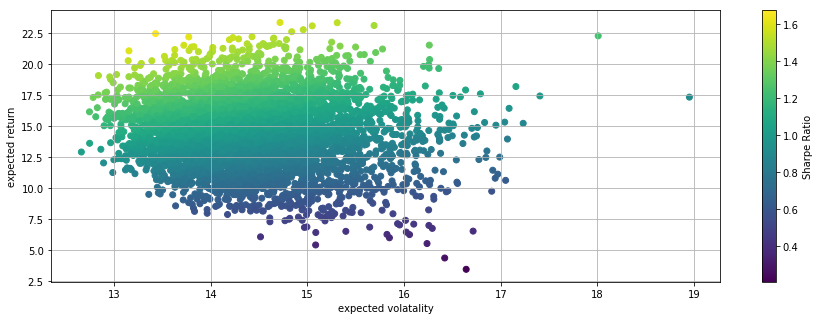

In [40]:
plt.figure(figsize  =(15,5))
plt.scatter(pv,pr,c=pr/pv,marker='o')
plt.grid(True)
plt.xlabel('expected volatality')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe Ratio')
plt.show()

# Function returns Portfolio Statistics

In [17]:
def stats(w):
    w = np.array(w)
    pr = np.sum(r.mean()*w)*252*100
    pv = np.sqrt(np.dot(w.T,np.dot(r.cov()*252,w)))*100
    return np.array([pr,pv,pr/pv])

# Finding the Optimum Portfolio

In [18]:
import scipy.optimize as sco

In [19]:
# Function to maxmise Sharpe Ratio 
def max_fun_sr(w):
    return stats(w)[2]
#Function to minimize Variance
def min_fun_var(w):
    return stats(w)[1]**2
def min_fun_std(w):
    return stats(w)[1]

In [20]:
#Constraints
eq_cons = {'type':'eq','fun':lambda x:np.sum(x)-1}

In [21]:
#weights bound btwn 0 and 1
noa = len(data.columns)
bnds =tuple((0,1) for x in range(noa))
weights = np.array([noa*[1./noa,]])

In [121]:
# Optimizing for getting minimum Variance for a portfolio
optv = sco.minimize(min_fun_var,weights,method = 'SLSQP',
                    options={'ftol': 1e-9, 'disp': False},
                    bounds =bnds , constraints = eq_cons)

In [23]:
optv['x'].round(3) #weights for minimum variance portfolio

array([0.3  , 0.   , 0.016, 0.064, 0.157, 0.107, 0.022, 0.057, 0.046,
       0.062, 0.171])

In [122]:
# Opmizing for getting minimum standard deviation
opts = sco.minimize(min_fun_std,weights,method = 'SLSQP',
                    options={'ftol': 1e-9, 'disp': False},
                    bounds =bnds , constraints = eq_cons)

In [34]:
er = stats(optv['x'])[0]  #Minimum Variance Portfolio
ev = stats(optv ['x'])[1]
stats(optv['x'].round(3))

array([16.25097411, 12.30131495,  1.32107618])

In [54]:
srx = max(pr)
[i for i,x in enumerate(pr) if x == max(pr)]


[1197]

In [56]:
sry = pv[1197]

In [25]:
trets = np.linspace(0.0,25.0,50)

In [123]:
tvols = []
for tret in trets:
    eq_cons_1 = {'type':'eq','fun':lambda x:stats(x)[0]-tret} #This 2 constraints ensure of getting Highest Sharpe Ratio
    eq_cons_2 = {'type':'eq','fun':lambda x:np.sum(x)-1}
    bnds =tuple((0,1) for x in range(noa))
    res = sco.minimize(min_fun_std,weights,method = 'SLSQP',
                       options={'ftol': 1e-9, 'disp': False},bounds =bnds ,
                       constraints = [eq_cons_1,eq_cons_2])
    tvols.append(res['fun'])
tvols = np.array(tvols)

In [77]:
sr =trets/tvols
srx = max(trets)
[i for i,x in enumerate(sr) if x == max(sr)]

[49]

In [78]:
sry = tvols[49]

# Plotting Minimum Variance Portfolio & Portfolio with maximum Sharpe Ratio

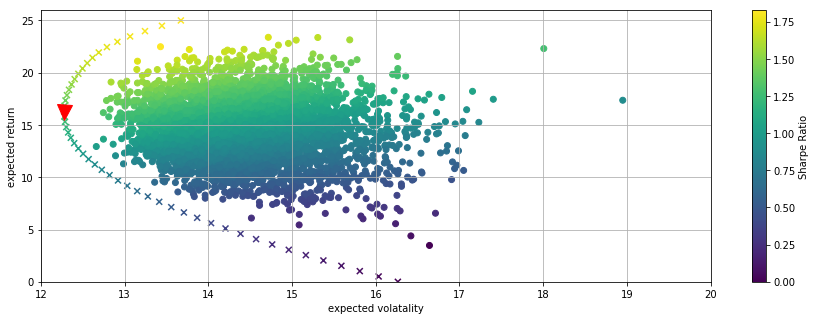

In [82]:
plt.figure(figsize = (15,5))
plt.xlim(12.0,20.0)
plt.ylim(0.0,26.0)
plt.scatter(pv , pr , c= pr/pv , marker = 'o')
plt.scatter(tvols , trets , c = trets/tvols , marker = 'x')
plt.plot(ev , er,'v',color = 'red' , ms = 15)
plt.plot(trets[49] , tvols[49],'*',color = 'red' , ms = 15)

plt.grid(True)
plt.xlabel('expected volatality')
plt.ylabel('expected return')
plt.colorbar(label= 'Sharpe Ratio')
plt.show()

# Capital Market Line

In [83]:
import scipy.interpolate as sci

In [88]:
# Selecting Portfolios on the efficient Frontier
ind = np.argmin(tvols)
evols = tvols[ind:]        #These array objects to be used for interpolation
erets = trets[ind:]

In [90]:
tck = sci.splrep(evols,erets) #Given the set of data points (x[i], y[i]) determine
                              #a smooth spline approximation of degree k on the interval 

In [91]:
def f(x):
    return sci.splev(x,tck,der=0) #Given the knots and coefficients 
                                  #of a B-spline representation, evaluate the value 
                                  #of the smoothing polynomial and its derivatives.
def df(x):
    return sci.splev(x,tck,der=1)

In [92]:
# Mathematical conditions to be satisfied by Capital Market Line
def eqn(p,rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf +p[1]*p[2]-f(p[2])
    eq3 = p[1]-df(p[2])
    return eq1, eq2, eq3

In [100]:
opt = sco.fsolve(eqn ,[6,25,12])

In [101]:
np.round(eqn(opt),3)

array([ 0.   ,  0.017, -0.241])

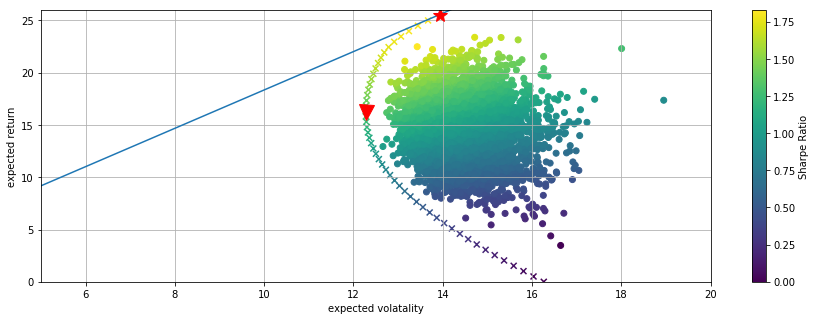

In [113]:
plt.figure(figsize = (15,5))
plt.xlim(5.0,20.0)
plt.ylim(0.0,26.0)
cx = np.linspace(0,25)
plt.scatter(pv , pr , c= pr/pv , marker = 'o')
plt.scatter(tvols , trets , c = trets/tvols , marker = 'x')
plt.plot(cx , opt[1]*cx + opt[0] , lw = 1.5)
plt.plot(ev , er,'v',color = 'red' , ms = 15)
plt.plot(opt[2] , f(opt[2]),'r*',color = 'red' , ms = 15)

plt.grid(True)
plt.xlabel('expected volatality')
plt.ylabel('expected return')
plt.colorbar(label= 'Sharpe Ratio')
plt.show()

In [114]:
res['x'].round(3)

array([0.296, 0.   , 0.194, 0.029, 0.222, 0.049, 0.   , 0.   , 0.083,
       0.   , 0.128])

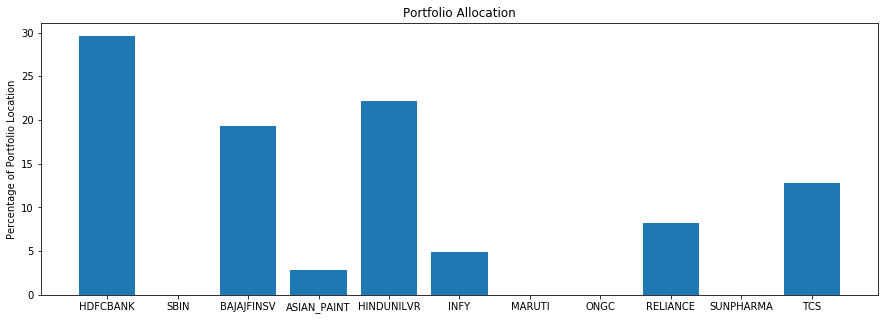

In [120]:
plt.figure(figsize = (15,5))
plt.bar(np.array(data.columns) , res['x']*100)
plt.ylabel('Percentage of Portfolio Location')
plt.title('Portfolio Allocation')
plt.show()